In [13]:
#3章　一般化線形モデル(GLM)
#########この章の簡単な説明######
"""""
架空の植物の種子数を推計するモデルを作成する
下記のデータdの変数は
y・・・種子数
x・・・個体の大きさ
f・・・肥料の処理をしたかどうか(Tが施肥処理あり、Cがなし)

"""""
import pandas as pd
import requests 

d = pd.read_csv("http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/poisson/data3a.csv")
d

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
5,4,8.32,C
6,9,10.61,C
7,9,10.06,C
8,9,9.93,C
9,11,10.43,C


In [15]:
#各変数の型の確認
d.dtypes

y      int64
x    float64
f     object
dtype: object

In [16]:
#変数の概要を調べる
d.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


<Figure size 720x288 with 0 Axes>

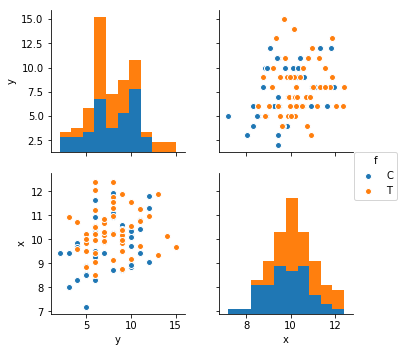

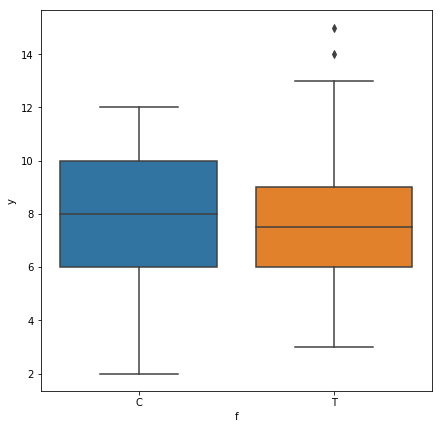

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#散布図
plt.figure(figsize=(10,4))
sns.pairplot(d,hue="f")

#箱ひげ図
plt.figure(figsize=(7,7))
sns.boxplot(d.f,d.y)


#pairplotを見る限り
#①施肥処理をしたほうが種子数が多くなる。
#②体サイズが大きいほうが種子数が多くなる。
#ことがわかる。

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

#まずは平均種子数に体サイズxのみが影響を与えていると考えるモデルを作成する(施肥処理を考慮に入れるのは後半)

# PythonにおいてGLMを実装する場合、statsmodels.apiやstatsmodels.formula.apiを用いる。
# 後者はRのglm関数と同じような分布になる。より柔軟にモデルが作れる。
#ポアソン分布回帰を行った場合、デフォルトでリンク関数はlogとなる。

d["const"]=1
model1 = smf.glm(formula="y~x", data=d, family=sm.families.Poisson())
res1 = model1.fit()
model2= sm.GLM(d.y, d.drop(["y","f"],axis=1), family=sm.families.Poisson())
res2 = model2.fit()

print("smfバージョン\n",res1.summary())
print("smバージョン\n",res2.summary())

#下記のzはWald統計量
#正規線形モデルにおけるt統計量にあたる部分だが,正規性の仮定がないから違うロジックが必要になる。
#smfで実装してもsmで実装しても同じ結果になる。


smfバージョン
                  Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Tue, 09 Oct 2018   Deviance:                       84.993
Time:                        03:53:46   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.12

In [13]:
####################################尤度の指定の仕方(family=で指定する)####################################
#ポアソン分布の場合：families.Poisson()
#正規分布の場合：families.Gaussian()
#二項分布の場合：Binomial([link])	Binomial exponential family distribution.
#ガンマ分布の場合：Gamma([link])	Gamma exponential family distribution.
#InverseGaussian([link])	InverseGaussian exponential family.
#負の二項分布の場合：NegativeBinomial([link, alpha])	Negative Binomial exponential family.
#Tweedie([link, var_power])

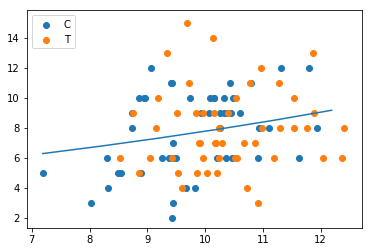

In [22]:
import numpy as np
#下記のグラフは上で推計した結果を用いて、平均種子数λ(ポアソン分布の期待値)と体サイズの関係を図示したもの。

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(d.x[d.f=="C"], d.y[d.f=="C"], label="C")
ax1.scatter(d.x[d.f=="T"], d.y[d.f=="T"], label="T")
ax1.legend(loc='upper left')
xx = np.arange(min(d.x), max(d.x), 1)
ax1.plot(xx, np.exp(1.2917+0.0757*xx))
plt.show(fig1)

In [23]:
#glmの結果summaryではAICが出力されないので、計算してみる。
-2*(-235.39-2)

474.78

In [24]:
####参考 summary2だとAICなどの情報がある####

print("summary2\n",res1.summary2())

#上で計算したAICと一致していることを確認

summary2
               Results: Generalized linear model
Model:              GLM              AIC:            474.7725 
Link Function:      log              BIC:            -366.3137
Dependent Variable: y                Log-Likelihood: -235.39  
Date:               2018-10-09 03:53 LL-Null:        -237.64  
No. Observations:   100              Deviance:       84.993   
Df Model:           1                Pearson chi2:   83.8     
Df Residuals:       98               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      1.2917    0.3637  3.5517  0.0004  0.5789  2.0045
x              0.0757    0.0356  2.1251  0.0336  0.0059  0.1454



In [25]:
#ここまでは説明変数として体サイズのみ使用したが、次は施肥処理のみのモデルを作成する。

#Rではカテゴリ変数をそのままモデルに組み込んでも勝手に処理してくれるが、Pythonは事前に処理をする必要がある。
#fをダミー変数化する。
d.loc[d["f"]=="C","f"]="0"
d.loc[d["f"]=="T","f"]="1"
d.f=d.f.astype(int)

In [26]:
### 参考
#sklearnのラベルエンコーダーでもダミー変数化できる

from sklearn import preprocessing
d3=d
gd=preprocessing.LabelEncoder()
gd.fit(d.f)
d3f=gd.transform(d.f)
d3["f"]=d3f
d3
d2.dtypes

#※注
#ラベルエンコーダーはカテゴリ変数を同じ項目の中で0,1,2・・・といった形でダミー変数化するが
#one-hot-encodingはCとTという列を新たに作成し、それぞれに0 or 1　が格納されるような形になる。
#one-hot-encodingのほうが好ましい(ラベルエンコーダーだと例えばカテゴリに大小関係が勝手の作られてしまう。)
#例:太郎、二郎、三郎という名前の項目をラベルエンコーダーでダミー変数化すると、それぞれ0,1,2となるが、これらに大小関係は本来ないはず。
#しかしカテゴリの数が多すぎる場合は、one-hot-encodingを用いると項目がかなり多くなってしまうので、やむを得ない場合はラベルエンコーダーを用いるのが良い。


y      int64
x    float64
f      int32
dtype: object

In [30]:
#定数項+ダミー変数のモデル
model3 = smf.glm(formula="y~f", data=d, family=sm.families.Poisson())
model4 = sm.GLM(d.y, d[["const","f"]], family=sm.families.Poisson())
res3 = model3.fit()
print(res3.summary())
res4 = model4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Tue, 09 Oct 2018   Deviance:                       89.475
Time:                        03:56:04   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f              0.0128      0.071      0.179      0.8

In [35]:
#AIC
-2*(-237.63-2)

479.26

In [34]:
print(res4.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            479.2545 
Link Function:      log              BIC:            -361.8317
Dependent Variable: y                Log-Likelihood: -237.63  
Date:               2018-10-09 03:58 LL-Null:        -237.64  
No. Observations:   100              Deviance:       89.475   
Df Model:           1                Pearson chi2:   87.1     
Df Residuals:       98               Scale:          1.0000   
Method:             IRLS                                      
----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
const    2.0516     0.0507   40.4630   0.0000    1.9522   2.1509
f        0.0128     0.0715    0.1787   0.8582   -0.1273   0.1529



In [39]:
#今度は定数項+x+ダミー変数のモデルを作成する。
model5 = smf.glm(formula="y~x+f", data=d, family=sm.families.Poisson())
res5 = model5.fit()
print(res5.summary())
model6 = sm.GLM(d.y, d[["const","x","f"]], family=sm.families.Poisson())
res6 = model6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Tue, 09 Oct 2018   Deviance:                       84.808
Time:                        04:00:31   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.0

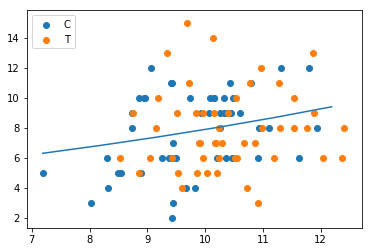

In [15]:
import numpy as np
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(d2.x[d2.f==0], d2.y[d2.f==0], label="C",)
ax1.scatter(d2.x[d2.f==1], d2.y[d2.f==1], label="T")
ax1.legend(loc='upper left')
xx = np.arange(min(d2.x), max(d2.x), 1)
ff = np.arange(min(d2.f), max(d2.f), 1)
ax1.plot(xx, np.exp(1.2631+0.0801*xx+(-0.032)*ff))
plt.show(fig1)

In [16]:
#AIC
-2*(-235.29-3)

476.58

In [40]:
print(res5.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            476.5874 
Link Function:      log              BIC:            -361.8936
Dependent Variable: y                Log-Likelihood: -235.29  
Date:               2018-10-09 04:02 LL-Null:        -237.64  
No. Observations:   100              Deviance:       84.808   
Df Model:           2                Pearson chi2:   83.8     
Df Residuals:       97               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    1.2631    0.3696   3.4172  0.0006   0.5386  1.9876
x            0.0801    0.0370   2.1620  0.0306   0.0075  0.1527
f           -0.0320    0.0744  -0.4302  0.6670  -0.1778  0.1138



In [42]:
#これまでのモデルでは、デフォルトでリンク関数が対数リンクだった。
#ここでは恒等リンク関数の場合を試す
#identityリンク関数が恒等リンク関数
model7 = smf.glm(formula="y~x+f",data=d, family=sm.families.Poisson(sm.families.links.identity))
res7 = model7.fit()
print(res7.summary())
model8 = sm.GLM(d["y"],d[["const","x","f"]], family=sm.families.Poisson(sm.families.links.identity))
res8 = model8.fit()
print(res8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.16
Date:                Tue, 09 Oct 2018   Deviance:                       84.538
Time:                        04:04:44   Pearson chi2:                     83.6
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2671      2.843      0.446      0.656      -4.306       6.840
x              0.6606      0.290      2.281      0.0

C:\Users\hirou\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)
C:\Users\hirou\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


In [18]:
### 参考
#ポアソン回帰で使えるリンク関数の表示
sm.families.family.Poisson.links
#ここにないリンク関数は使用できないので注意

[statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.identity,
 statsmodels.genmod.families.links.sqrt]

In [52]:
#AIC
print(-2*(-235.16-3))

476.32
476.31794508841523


In [43]:
print(res7.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            476.3179 
Link Function:      identity         BIC:            -362.1631
Dependent Variable: y                Log-Likelihood: -235.16  
Date:               2018-10-09 04:06 LL-Null:        -237.64  
No. Observations:   100              Deviance:       84.538   
Df Model:           2                Pearson chi2:   83.6     
Df Residuals:       97               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    1.2671    2.8433   0.4456  0.6559  -4.3057  6.8398
x            0.6606    0.2897   2.2807  0.0226   0.0929  1.2284
f           -0.2048    0.5823  -0.3517  0.7251  -1.3459  0.9364



In [52]:
### 参考　gml関連のパラメータ
print("係数\n",res7.params)
print()
print("AIC\n",res7.aic)

係数
 Intercept    1.267053
x            0.660646
f           -0.204754
dtype: float64

AIC
 476.3179450884154


In [53]:
###参考　summaryにあるDevianceに関して

#これは残差逸脱度を意味している。
#具体的な意味としては、あてはめたモデルにおける逸脱度(-2*最大対数尤度)と、フルモデル(データサイズ=パラメータの数となるモデル)における逸脱度の差
#フルモデルにおける逸脱度は実現できる最小の逸脱度を意味する。

In [57]:
#5章 GLMの尤度比検定と検定の非対称性

"""""
3章で、ある植物の種子数に関して体サイズや施肥効果を用いたモデルを作成した。
ここではそれらの結果に対して検定などを行う。
この章で紹介されているのは①パラメトリックブートスラップ法と②尤度比検定である。
仮説としては、
帰無仮説:一定モデル
対立仮説:定数項+体サイズ
としている。
"""""
#まずは一定モデルを作成する
model_const=smf.glm(formula="y~1",data=d,family=sm.families.Poisson())
res_const=model_const.fit()
print(res_const.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Tue, 09 Oct 2018   Deviance:                       89.507
Time:                        04:34:56   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128


In [64]:
#パラメトリックブートストラップ

deviance=res_const.deviance-res1.deviance
print("逸脱度の差:",deviance)
deviance_list=[]

from numpy.random import *

for i in range(1,1001):
    #ポアソン分布からの乱数を100個発生
    #7.85はexp(2.06)のこと
    #2.06は一定モデルにおける定数項の推定値。一定モデルが正しいと仮説したうえでの話なので、平均7.85のポアソン乱数を用いる
    y_ran=poisson(7.85,100)
    d["y_ran"]=y_ran
    #対立仮説は定数項+x
    model_tairitsu = smf.glm(formula="y_ran~x",data=d, family=sm.families.Poisson())
    tairitsu = model_tairitsu.fit()
    #帰無仮説は一定モデル
    model_kimu = smf.glm(formula="y_ran~1", data=d,family=sm.families.Poisson())
    kimu = model_kimu.fit()
    deviance_list.append(kimu.deviance-tairitsu.deviance)

deviance_list

逸脱度の差: 4.513941078851744


[0.005198877841607441,
 0.5831319210457195,
 0.09419896410618378,
 0.44284459745945526,
 8.27425853810061,
 1.5291646936937298,
 0.4024889678402701,
 2.5707828818140968,
 0.018162135584276484,
 3.1024856841576423,
 1.9008535607280947,
 0.014472293595943597,
 2.2639786990068416,
 0.02627305844019645,
 0.13733089061916814,
 0.15936608374853733,
 2.815414509884519,
 0.0100400064959274,
 0.32103381595938174,
 0.460447076326858,
 0.003404569585001127,
 0.0027221145051896656,
 1.3129690209579366,
 0.029536601520206318,
 2.1484162291848037,
 0.38019547699695977,
 0.000947409972297919,
 0.2062672629387805,
 5.812350169591909,
 0.09979588819521723,
 4.2095429975574916e-05,
 0.28224955428183307,
 0.16213324008755592,
 0.00010157963795620617,
 0.3752700161258531,
 0.09198007076201975,
 0.8080614041410712,
 0.047239806739412415,
 0.03348913587396396,
 1.6193106881378725,
 0.4926549882170974,
 0.17781269893941953,
 1.7928298751219813,
 0.00223259260936004,
 0.06589180021865104,
 3.557634876236321,


C:\Users\hirou\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hirou\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


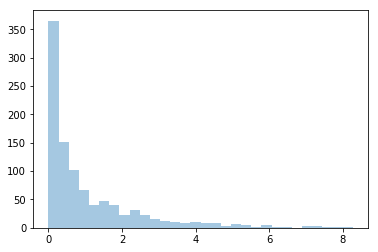

In [65]:
sns.distplot(deviance_list,kde=False)

In [66]:
#乱数を発生させた結果で元のデータで算出したdeviance以上のものの個数を算出
print("逸脱度以上の個数\n" + str((deviance_list>=deviance).sum()))
print("逸脱度以上の割合\n" + str((deviance_list>=deviance).sum()/10) + "%")

逸脱度以上の個数
40
逸脱度以上の割合
4.0%


In [130]:
#95%点の算出
np.percentile(deviance_list,95)

4.194073653877192

In [ ]:
#つまり有意水準を5%ととするならば、帰無仮説は棄却される→一定モデルはただしくない。

In [67]:
#χ二乗検定(尤度比検定)
#こちらは一般的な検定手法の尤度比検定により検定を行う。
#-2*log(帰無仮説における最大対数尤度/対立仮説における最大対数尤度)は
#近似的にχ二乗分布に従う。自由度は対立仮説の制約の数となる。この場合は体サイズにかかる係数=0という1つのみ
#なので自由度は1

from scipy import stats

data=-2*(res_const.llf-res1.llf)
p_value = stats.chi2.sf(x=data, df=1)
p_value

0.03361969100898115

In [ ]:
#こちらの検定法に関しても、有意水準を5%ととするならば帰無仮説は棄却される→一定モデルは正しくない。

In [ ]:
#　感想
#パラメトリックブートストラップはこの教科書で初めて知ったが、なるほどと思う内容だった。
#しかし、一つ疑問がある。
#パラメトリックブートストラップを用いる際、yを平均7.85のポアソン乱数を用いて発生させた。
#仮説検定の文脈では帰無仮説が正しいとしたうえで理論を構築するため、
#帰無仮説である一定モデルの推計結果である「平均=7.85」とすることには異論はない。
#しかしyとxの組み合わせに意味があるので、yのみ乱数を発生させxはデータをそのまま使って回帰をし、それを繰り返して検定を行うというのは違和感がある。
#つまりループ処理の中のmodel_tairitsuの部分が引っかかる。
#実際に行うことはできないが、本来の形としてはyとそれに対応したxをたくさん発生させ、その中で今回の結果が珍しいのかどうかを判断するべきはず。
#しかしxは乱数で発生できないので、yのみ乱数を発生させている。この場合、本来の形の代用になるのかがしっくりこない。
#パラメトリックブートストラップに関しては、今後も少し調べるべき課題とする。

